In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [16]:
df = pd.read_csv("ccpp.csv")
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [20]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [26]:
df.shape

(9568, 5)

In [40]:
x = df.drop(['PE'],axis = 1).values
x = pd.DataFrame(x)
x

,0,1,2,3
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20
...,...,...,...,...
9563,15.12,48.92,1011.80,72.93
9564,33.41,77.95,1010.30,59.72
9565,15.99,43.34,1014.20,78.66
9566,17.65,59.87,1018.58,94.65


In [43]:
y = df['PE'].values
y = pd.DataFrame(y)
y

,0
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43
...,...
9563,462.59
9564,432.90
9565,465.96
9566,450.93


In [118]:
#Iteration 1

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)
type(x_train)

pandas.core.frame.DataFrame

In [120]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [122]:
y_predict = model.predict(x_test)

In [124]:
#test data
model.predict([[14.96,41.76,1024.07,73.17]])

array([[467.35592062]])

In [126]:
mse = mean_squared_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared {r2:.2f}")

Mean Squared Error: 20.60
R-Squared 0.93


In [128]:
model.score(x,y)

0.9286890531329729

In [130]:
y_test = np.array(y_test).flatten()
y_predict = np.array(y_predict).flatten()
pred_y_df = pd.DataFrame({"Acutal Values":y_test, "predicted values":y_predict, "Difference":y_test-y_predict})
pred_y_df

,Acutal Values,predicted values,Difference
0,426.18,433.332595,-7.152595
1,451.10,448.379693,2.720307
2,442.87,445.912478,-3.042478
3,443.70,445.986055,-2.286055
4,460.59,462.822292,-2.232292
...,...,...,...
2866,440.27,443.739019,-3.469019
2867,438.42,442.129053,-3.709053
2868,442.88,444.058091,-1.178091
2869,456.64,459.347457,-2.707457


In [132]:
model.coef_

array([[-1.9797936 , -0.23300225,  0.06812315, -0.15839461]])

In [134]:
model.intercept_

array([448.53067141])

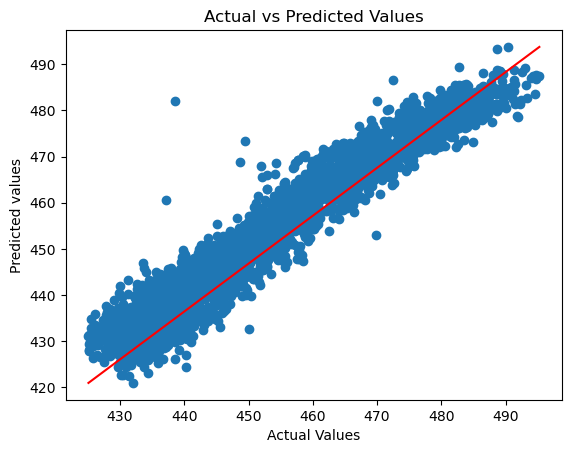

In [136]:
plt.scatter(y_test,y_predict)
plt.plot([min(y_test), max(y_test)],[min(y_predict), max(y_predict)], color = 'red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values')
plt.show()


In [142]:
#Iteration 1

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 43)
type(x_train)
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [146]:
y_predict = model.predict(x_test)
mse = mean_squared_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared {r2:.2f}")

Mean Squared Error: 21.72
R-Squared 0.92


In [150]:
model.score(x,y)

0.9286843103812075

In [154]:
y_test = np.array(y_test).flatten()
y_predict = np.array(y_predict).flatten()
pred_y_df = pd.DataFrame({"Acutal Values":y_test, "predicted values":y_predict, "Difference":y_test-y_predict})
pred_y_df

,Acutal Values,predicted values,Difference
0,440.46,440.251049,0.208951
1,437.99,438.337436,-0.347436
2,466.95,467.242946,-0.292946
3,475.88,472.973949,2.906051
4,440.56,430.213226,10.346774
...,...,...,...
2866,472.54,471.771230,0.768770
2867,433.71,442.302387,-8.592387
2868,437.80,432.809799,4.990201
2869,479.28,472.777189,6.502811


In [158]:
model.coef_

array([[-1.98380545, -0.23201127,  0.05185374, -0.15707458]])

In [162]:
model.intercept_

array([464.92034028])

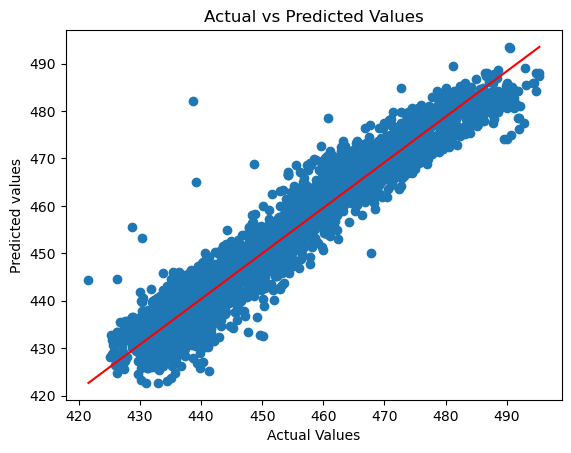

In [164]:
plt.scatter(y_test,y_predict)
plt.plot([min(y_test), max(y_test)],[min(y_predict), max(y_predict)], color = 'red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values')
plt.show()

Mean Squared Error: 20.69
R-Squared 0.93
Accuracy Score: 0.9286867872621933
      Acutal Values  predicted values  Difference
0            426.18        433.338695   -7.158695
1            451.10        448.381768    2.718232
2            442.87        445.984692   -3.114692
3            443.70        445.996297   -2.296297
4            460.59        462.790519   -2.200519
...             ...               ...         ...
3823         434.21        440.100327   -5.890327
3824         431.19        431.972177   -0.782177
3825         450.86        448.296619    2.563381
3826         456.44        452.628175    3.811825
3827         467.21        469.691145   -2.481145

[3828 rows x 3 columns]
coefficient: [[-1.96843024 -0.23826082  0.0676831  -0.15907504]]
Intercept: [449.08571405]


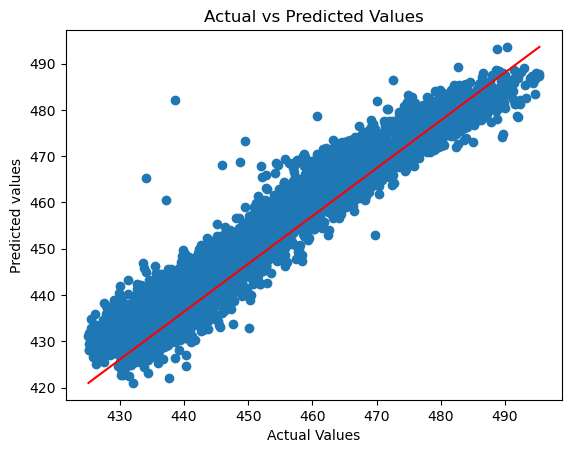

In [199]:
#iteration - 2

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4, random_state = 0)
type(x_train)
model = LinearRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
mse = mean_squared_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared {r2:.2f}")
print("Accuracy Score:",model.score(x,y))
y_test = np.array(y_test).flatten()
y_predict = np.array(y_predict).flatten()
pred_y_df = pd.DataFrame({"Acutal Values":y_test, "predicted values":y_predict, "Difference":y_test-y_predict})
print(pred_y_df)
print("coefficient:",model.coef_)
print("Intercept:",model.intercept_)
plt.scatter(y_test,y_predict)
plt.plot([min(y_test), max(y_test)],[min(y_predict), max(y_predict)], color = 'red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values')
plt.show()

Mean Squared Error: 21.39
R-Squared 0.93
Accuracy Score: 0.9286775699390023
      Acutal Values  predicted values  Difference
0            440.46        440.221732    0.238268
1            437.99        438.303447   -0.313447
2            466.95        467.217137   -0.267137
3            475.88        472.959111    2.920889
4            440.56        430.184352   10.375648
...             ...               ...         ...
3823         482.31        476.798255    5.511745
3824         429.84        435.487517   -5.647517
3825         443.02        447.920906   -4.900906
3826         451.38        453.425029   -2.045029
3827         435.41        437.130969   -1.720969

[3828 rows x 3 columns]
coefficient: [[-1.98832899 -0.23169164  0.0484216  -0.1582736 ]]
Intercept: [468.54326939]


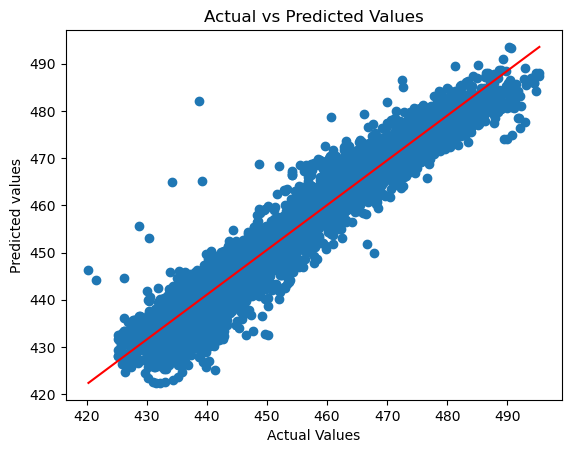

In [201]:
#iteration - 2

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4, random_state = 43)
type(x_train)
model = LinearRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
mse = mean_squared_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared {r2:.2f}")
print("Accuracy Score:",model.score(x,y))
y_test = np.array(y_test).flatten()
y_predict = np.array(y_predict).flatten()
pred_y_df = pd.DataFrame({"Acutal Values":y_test, "predicted values":y_predict, "Difference":y_test-y_predict})
print(pred_y_df)
print("coefficient:",model.coef_)
print("Intercept:",model.intercept_)
plt.scatter(y_test,y_predict)
plt.plot([min(y_test), max(y_test)],[min(y_predict), max(y_predict)], color = 'red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values')
plt.show()

Mean Squared Error: 20.33
R-Squared 0.93
Accuracy Score: 0.9286328322723267
      Acutal Values  predicted values  Difference
0            426.18        433.225912   -7.045912
1            451.10        448.368325    2.731675
2            442.87        446.055372   -3.185372
3            443.70        445.989381   -2.289381
4            460.59        462.727582   -2.137582
...             ...               ...         ...
4779         470.07        469.438402    0.631598
4780         460.87        464.333831   -3.463831
4781         444.90        440.589084    4.310916
4782         465.63        466.204272   -0.574272
4783         430.32        433.461686   -3.141686

[4784 rows x 3 columns]
coefficient: [[-1.94756722 -0.25103187  0.07246607 -0.15942899]]
Intercept: [444.52367365]


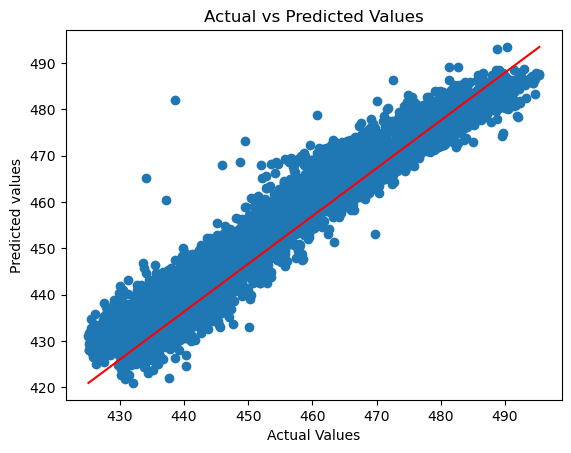

In [206]:
#iteration - 3

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.5, random_state = 0)
type(x_train)
model = LinearRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
mse = mean_squared_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared {r2:.2f}")
print("Accuracy Score:",model.score(x,y))
y_test = np.array(y_test).flatten()
y_predict = np.array(y_predict).flatten()
pred_y_df = pd.DataFrame({"Acutal Values":y_test, "predicted values":y_predict, "Difference":y_test-y_predict})
print(pred_y_df)
print("coefficient:",model.coef_)
print("Intercept:",model.intercept_)
plt.scatter(y_test,y_predict)
plt.plot([min(y_test), max(y_test)],[min(y_predict), max(y_predict)], color = 'red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values')
plt.show()

Mean Squared Error: 20.90
R-Squared 0.93
Accuracy Score: 0.9286673248775972
      Acutal Values  predicted values  Difference
0            440.46        440.123207    0.336793
1            437.99        438.315508   -0.325508
2            466.95        467.276938   -0.326938
3            475.88        473.006299    2.873701
4            440.56        430.221497   10.338503
...             ...               ...         ...
4779         475.43        474.182576    1.247424
4780         442.42        444.300557   -1.880557
4781         459.45        455.053334    4.396666
4782         440.38        443.810522   -3.430522
4783         429.83        428.472054    1.357946

[4784 rows x 3 columns]
coefficient: [[-1.98113689 -0.23915676  0.04713038 -0.15864074]]
Intercept: [470.15936802]


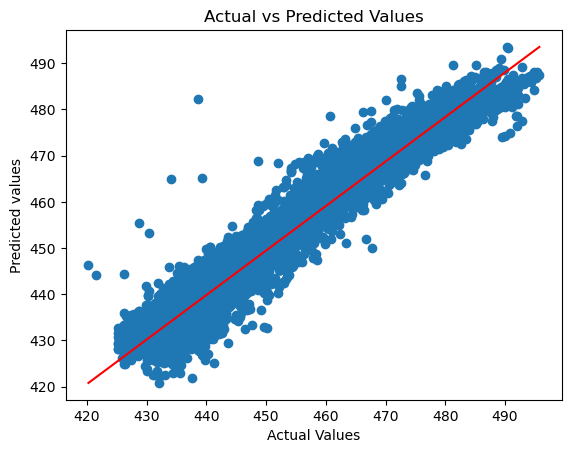

In [208]:
#iteration - 3

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.5, random_state = 43)
type(x_train)
model = LinearRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
mse = mean_squared_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared {r2:.2f}")
print("Accuracy Score:",model.score(x,y))
y_test = np.array(y_test).flatten()
y_predict = np.array(y_predict).flatten()
pred_y_df = pd.DataFrame({"Acutal Values":y_test, "predicted values":y_predict, "Difference":y_test-y_predict})
print(pred_y_df)
print("coefficient:",model.coef_)
print("Intercept:",model.intercept_)
plt.scatter(y_test,y_predict)
plt.plot([min(y_test), max(y_test)],[min(y_predict), max(y_predict)], color = 'red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values')
plt.show()